In [40]:
# Notebook 1 - Data Preparation
from data_preparation_pipeline import FinancialMLPipeline

# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Viz
import matplotlib.animation as animation

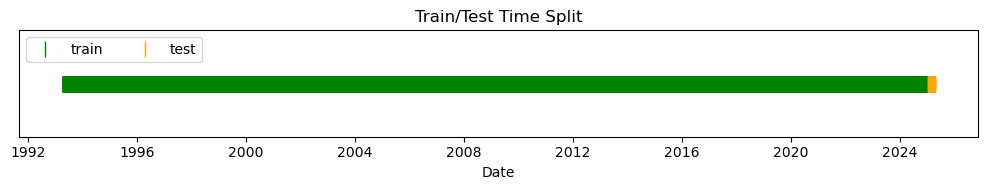

In [2]:
pipeline = FinancialMLPipeline()
df_full = pipeline.run(buy_threshold=0.005,sell_threshold=0.001,test_start='2025-01-20')

In [8]:
df_full.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Lag1_VIX', 'Lag1_TNX', 'RSI', 'MACD', 'Stoch_Osc', 'SMA20', 'SMA50',
       'EMA20', 'ATR', 'BB_High', 'BB_Low', 'Rolling_Std_20', 'OBV',
       'Volume_Change', 'Log_Return', 'Daily_Range', 'Body', 'Gap', 'Target',
       'set'],
      dtype='object')

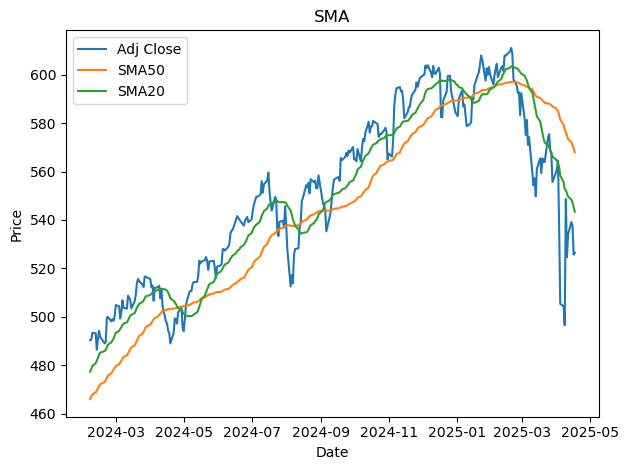

In [36]:
cols = [ 'Adj Close','SMA50', 'SMA20']
dates_a = df_full.iloc[-300:]['Date'].values
vals_a = df_full.iloc[-300:][cols]

for col in cols:
    plt.plot(dates_a, vals_a[col], label=col)

plt.legend()
plt.title("SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig('sma_viz')
plt.show()


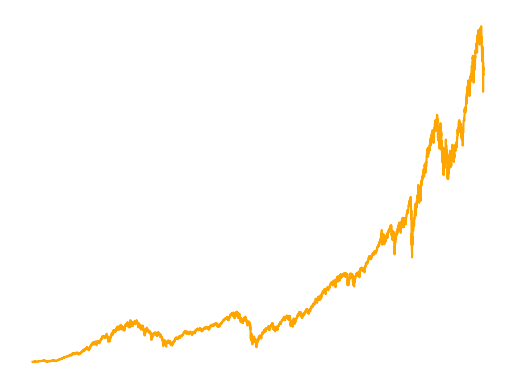

In [20]:
plt.plot(df_full['Date'],df_full['Adj Close'],color='orange', label='SPY')
plt.axis(False)
plt.savefig('spy_no_axis')
plt.show()

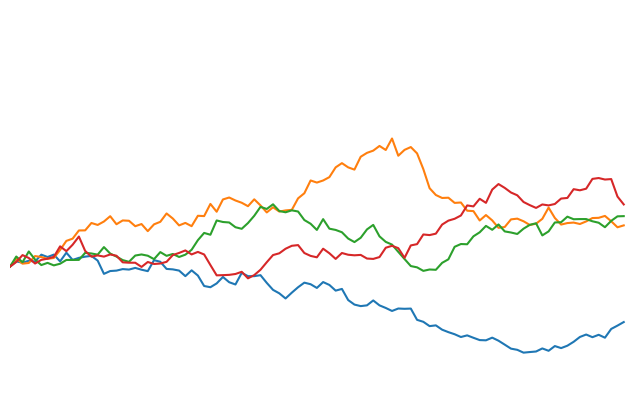

In [39]:
# Parameters
S0 = 100      # Initial stock price
mu = 0.05     # Drift
sigma = 0.2   # Volatility
T = 1.0       # Time horizon (1 year)
dt = 0.01     # Time step
N = int(T/dt) # Number of steps
n_paths = 4  # Number of GBM paths

# Simulate GBM
t = np.linspace(0, T, N)
paths = np.zeros((n_paths, N))
paths[:, 0] = S0

for i in range(1, N):
    Z = np.random.standard_normal(n_paths)
    paths[:, i] = paths[:, i-1] * np.exp((mu - 0.5 * sigma**2)*dt + sigma * np.sqrt(dt) * Z)

# Create animation
fig, ax = plt.subplots(figsize=(8, 5))
lines = [ax.plot([], [])[0] for _ in range(n_paths)]

def init():
    ax.set_xlim(0, T)
    ax.set_ylim(0.5 * S0, 2 * S0)
    ax.axis("off")  # Hides everything: ticks, borders, labels
    return lines

def update(frame):
    for line, path in zip(lines, paths):
        line.set_data(t[:frame], path[:frame])
    return lines

ani = animation.FuncAnimation(fig, update, frames=N, init_func=init, blit=True)

# Save as GIF
ani.save("gbm_simulation.gif", writer="pillow", fps=30)